# 75.06/95.58 Organización de Datos
# Análisis exploratorio: Real or Not? NLP with Disaster Tweets

## Introducción

(escribir una introducción y objetivos y explicar las columnas de datos)

### Carga de librerías

In [50]:
import pandas as pd

import numpy as np
import datetime as dt

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS #conda install -c conda-forge wordcloud 
from  imageio import imread
import squarify # pip install squarify


%matplotlib inline

### Carga de datos
Debido a que se trabajara con grandes cantidades de data, se definió convenientemente los tipos de datos de los datos pasados por archivo para no sobrecargar al parser de los archivos csv y ahorrar espacio de memoria.

#### Archivo sample

In [2]:
sample = pd.read_csv("sample_submission.csv")
# Se observa que es un data frame que sólo contiene informacion sobre los ids

#### Archivo test

In [3]:
dtype_test = {"id": np.int32, "keyword": "category"}
test = pd.read_csv("test.csv", dtype = dtype_test)

#### Archivo train

In [4]:
dtype_train = {"id": np.int32, "keyword": "category", "target" : bool}
train = pd.read_csv("train.csv", dtype = dtype_train)

## Análisis de datos

###  1 Análisis de hashtags

Funciones auxiliares:

In [77]:
'''Recibe un tweet en forma de string y devuelve otro string con sus hashtags con el separador ',' de por medio
y en minuscula.'''
def get_hashtags(tweet):
    res = ""
    words = tweet.split(' ')
    for word in words:
        if(word != "" and word[0]=='#'):
            res += word.lower() +" "
    return res[:-1]

'''Recibe un string y devuelve la cantidad de substrings que son separados por un delimitador ',' .'''
def cant_substrings(string):
    cant = 0
    delimiter =  '#'
    for c in string:
        if(c == delimiter):
            cant += 1
    return cant

Creo un nuevo dataframe especialmente para los hashtags.

In [6]:
df_hashtags = train[['id', 'text', 'target']]
df_hashtags['hashtags'] = df_hashtags['text'].apply(get_hashtags).astype(str)
df_hashtags['cant_hashtags'] = df_hashtags['text'].apply(cant_substrings)

/home/anichu/Programs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
df_hashtags_only = df_hashtags.loc[df_hashtags['hashtags']!='']
df_sin_hashtags = df_hashtags.loc[df_hashtags['hashtags']=='']

Calculamos la cantidade de tweets con y sin hashtag.

In [9]:
cant_tweets = df_hashtags.agg('count')[0]
cant_tweets_con_hashtag = df_hashtags_only.agg('count')[0]
cant_tweets_sin_hashtag = cant_tweets - cant_tweets_con_hashtag

#### 1.1 Hashtags más usados

Generamos un texto con todos los hashtags

In [10]:
words = '' 
stopwords = set(STOPWORDS) 
  
    
index = df_hashtags_only.index.tolist()
for i in index:
    words += df_hashtags_only.loc[i, "hashtags"] + " "

Gráfico de hashtags más usados usando un wordcloud

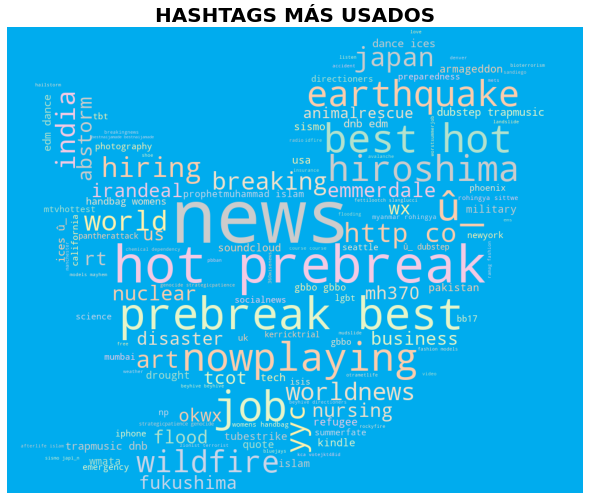

In [14]:
twitter_mask = imread('twitter.png')

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='#00acee', 
                stopwords = stopwords, 
                min_font_size = 7,
                mask=twitter_mask,
                colormap= "Pastel2").generate(words) 
  
plt.figure(figsize = (8, 8))
plt.title("HASHTAGS MÁS USADOS", loc='center', fontsize =20, fontweight = 'bold')
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

#### 1.2 Falsedad o veracidad de los tweets dependiendo de la cantidad de hashtags

Observamos que auqellos tweets analizados sin hashtags son 58.87% falsos y 41.13% reales.

In [27]:
df_sin_hashtags["target"].value_counts()

False    3477
True     2429
Name: target, dtype: int64

Separo por aquellos tweets con hashtag los reales de los falsos:

In [97]:
df_hashtags_real = df_hashtags_only.loc[df_hashtags['target']==True]['cant_hashtags']
df_hashtags_falso = df_hashtags_only.loc[df_hashtags['target']==False]['cant_hashtags']

In [105]:
cant_hashtags_falsos = df_hashtags_falso.value_counts()
cant_hashtags_verdaderos = df_hashtags_real.value_counts()

sum_cant_hashtags_falsos = cant_hashtags_falsos.sum()
sum_cant_hashtags_verdaderos = cant_hashtags_verdaderos.sum()
porcentaje_cant_hashtags_falsos = sum_cant_hashtags_falsos / (sum_cant_hashtags_falsos + sum_cant_hashtags_verdaderos)

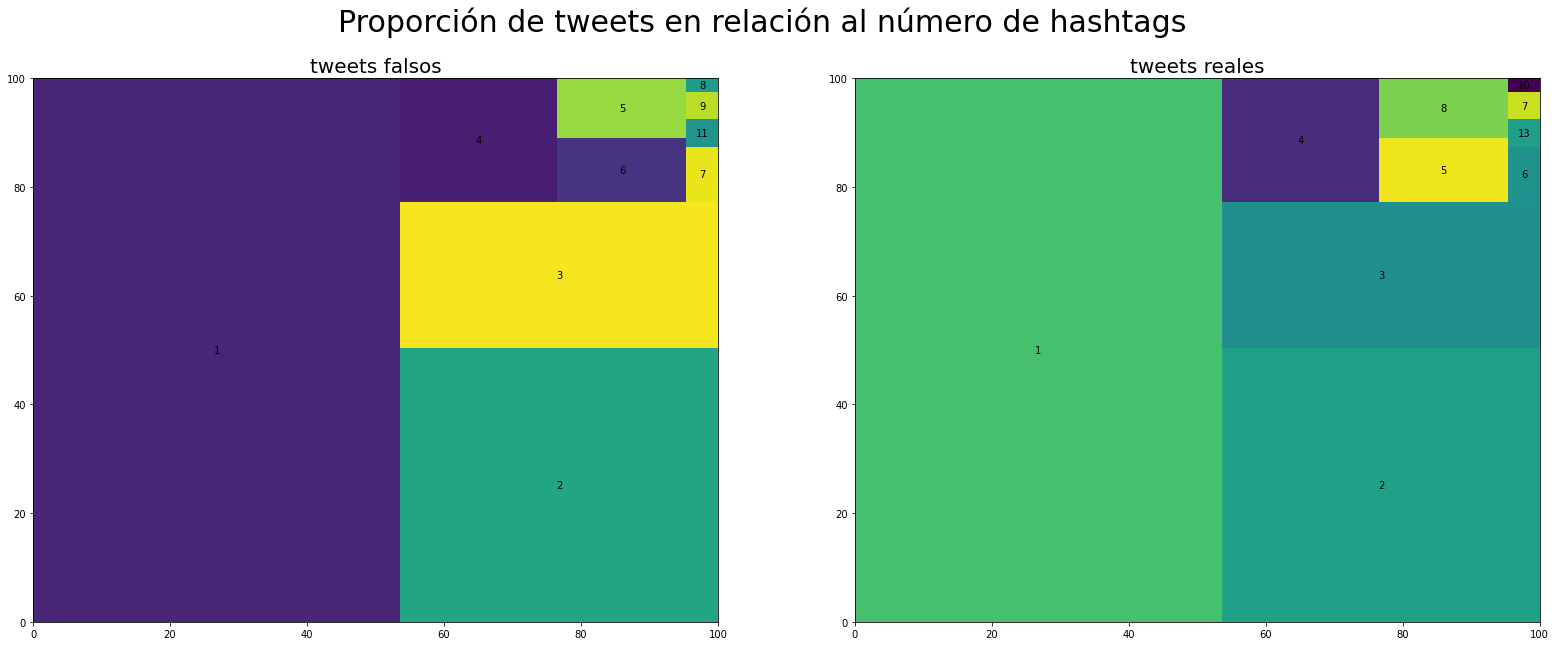

In [132]:
fig, axes = plt.subplots(1, 2, figsize = (27,10))

fig.suptitle('Proporción de tweets en relación al número de hashtags', fontsize =30)
axes[0].set_title('tweets falsos', size=20)
axes[1].set_title('tweets reales', size=20)

squarify.plot(cant_hashtags_falsos, label = cant_hashtags_falsos.index, ax=axes[0])
squarify.plot(cant_hashtags_falsos, label = cant_hashtags_verdaderos.index, ax=axes[1])

plt.show()